# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

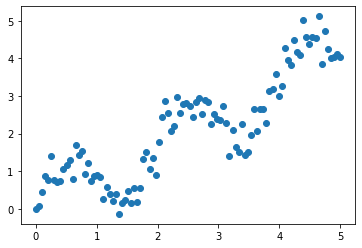

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.4785134429449284


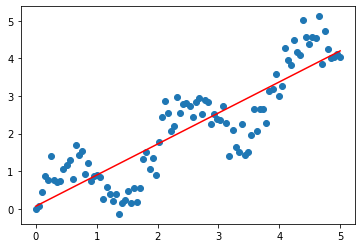

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

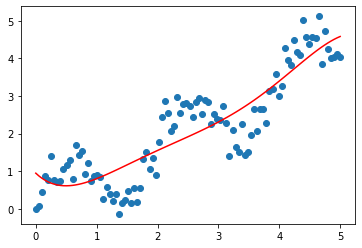

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [16]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.47610227  0.9294618  -0.42798929  0.09698188 -0.00784717]
interception:  0.8828562606329244


In [13]:
W=regr_poly.coef_
b=regr_poly.intercept_
# w要轉置成5x1的矩陣才可以dot積
np.dot(X_poly,W.T)+b

array([0.94765831, 0.87523748, 0.81319688, 0.76083723, 0.71748889,
       0.68251128, 0.65529228, 0.6352477 , 0.62182065, 0.614481  ,
       0.61272475, 0.61607351, 0.62407388, 0.6362969 , 0.65233743,
       0.67181361, 0.69436626, 0.71965832, 0.74737423, 0.77721939,
       0.80891958, 0.84222036, 0.87688648, 0.91270136, 0.94946642,
       0.9870006 , 1.0251397 , 1.06373584, 1.10265687, 1.14178581,
       1.18102022, 1.2202717 , 1.25946522, 1.29853862, 1.33744197,
       1.37613704, 1.41459667, 1.45280426, 1.4907531 , 1.52844588,
       1.56589404, 1.60311724, 1.64014275, 1.67700489, 1.71374444,
       1.75040805, 1.7870477 , 1.82372008, 1.86048601, 1.89740989,
       1.93455912, 1.97200348, 2.0098146 , 2.04806534, 2.08682923,
       2.1261799 , 2.16619049, 2.20693306, 2.24847802, 2.29089356,
       2.33424507, 2.37859452, 2.42399996, 2.47051485, 2.51818755,
       2.56706071, 2.61717069, 2.66854699, 2.72121168, 2.77517878,
       2.83045373, 2.88703278, 2.94490243, 3.00403882, 3.06440

In [14]:
regr_poly.predict(X_poly)

array([0.94765831, 0.87523748, 0.81319688, 0.76083723, 0.71748889,
       0.68251128, 0.65529228, 0.6352477 , 0.62182065, 0.614481  ,
       0.61272475, 0.61607351, 0.62407388, 0.6362969 , 0.65233743,
       0.67181361, 0.69436626, 0.71965832, 0.74737423, 0.77721939,
       0.80891958, 0.84222036, 0.87688648, 0.91270136, 0.94946642,
       0.9870006 , 1.0251397 , 1.06373584, 1.10265687, 1.14178581,
       1.18102022, 1.2202717 , 1.25946522, 1.29853862, 1.33744197,
       1.37613704, 1.41459667, 1.45280426, 1.4907531 , 1.52844588,
       1.56589404, 1.60311724, 1.64014275, 1.67700489, 1.71374444,
       1.75040805, 1.7870477 , 1.82372008, 1.86048601, 1.89740989,
       1.93455912, 1.97200348, 2.0098146 , 2.04806534, 2.08682923,
       2.1261799 , 2.16619049, 2.20693306, 2.24847802, 2.29089356,
       2.33424507, 2.37859452, 2.42399996, 2.47051485, 2.51818755,
       2.56706071, 2.61717069, 2.66854699, 2.72121168, 2.77517878,
       2.83045373, 2.88703278, 2.94490243, 3.00403882, 3.06440

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [15]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [16]:
sigma = 0.3

In [17]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [18]:
regr_rbf = LinearRegression()

In [19]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

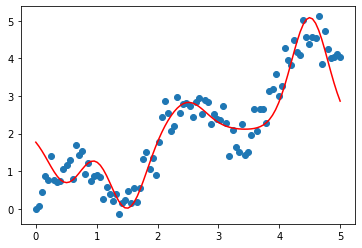

In [20]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [21]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.42004679 -2.10650318  0.71195931 -0.01907369  2.9566509 ]
interception:  2.1252054007474372


#### Comparison

In [22]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

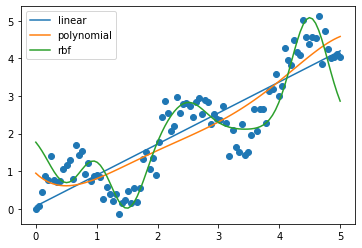

In [23]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [24]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.4785134429449284


In [25]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4158883375332428


In [26]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2618872832872854
